# Drawing epithelia with matplotlib 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

try:
    import seaborn as sns
except ImportError:
    print('Seaborn is not installed')
%matplotlib inline

from tyssue import Sheet, config
from tyssue import SheetGeometry as geom
from tyssue.generation import three_faces_sheet

from tyssue.draw.plt_draw import sheet_view, quick_edge_draw
# Grab the default settings for drawing
draw_specs = config.draw.sheet_spec()

### Create a sheet

In [4]:
datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)
geom.update_all(sheet)

## Default quick draw of the edges

This function is quite fast (for matplotlib standards - this is no GL like speeds), but color and other aspects can't be accessed by individual edges.

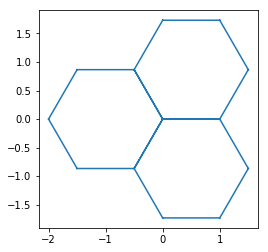

In [5]:
fig, ax = quick_edge_draw(sheet, ['x', 'y'])

## `sheet_view` - more configurable render

### Default

The default follows your matplotlibrc. Note that half-edges are represented as left arrow. This allows to make sure of the correct orientation of the faces.

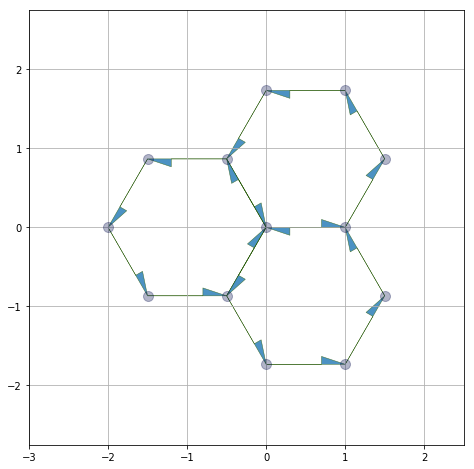

In [6]:

fig, ax = sheet_view(sheet, ['x', 'y'])


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))
    


### Coloring with colormaps

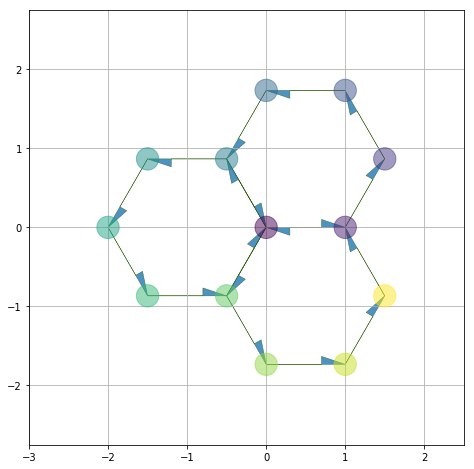

In [7]:
## Let's add a column to sheet.vert_df
sheet.vert_df['rand'] = np.linspace(0.0, 1.0, 
                                    num=sheet.vert_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.vert_df.rand)

## in draw_specs, arguments are identical to 
## the plt.plot() kwargs
draw_specs['vert']['color'] = color_cmap
draw_specs['vert']['alpha'] = 0.5
draw_specs['vert']['s'] = 500

coords = ['x', 'y']
fig, ax = sheet_view(sheet, coords, **draw_specs)

ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

### Filling the cells



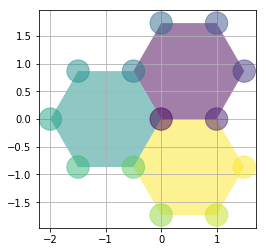

In [8]:
sheet.face_df['col'] = np.linspace(0.0, 1.0, 
                                    num=sheet.face_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.face_df.col)

draw_specs['edge']['visible'] = False

draw_specs['face']['visible'] = True
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5


fig, ax = sheet_view(sheet, coords, **draw_specs)